# <center><font size=10, color="#7B242F"><u> Adaptive Boosting: Adaboost</u> </font>

# Boosting

- A $\textbf{boosting}$ algorithm is an $\textbf{ensemble}$ technique that helps to improve model performance and accuracy by taking a group of **weak learners** and combining them to form a $\textbf{strong learner}$.

- The idea behind $\textbf{boosting}$ is that predictors should learn from mistakes that have been made by previous predictors. In other words, in boosting many predictors are trained and each predictor learns from the errors of its predecessor.


- A weak learner is a model doing slightly better than random guessing. For example, a decision tree with a maximum-depth of one, known as a **decision-stump**, is a weak learner.


- In boosting, an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor. 

- There are several boosting algorithms, such as $\textbf{Adaboost, Gradient Boosting and Stochastic Gradient Boosting}$. In this lecture, we will focus on **Adaboost**. the other two will be explored in later lectures.


### Adaboost

- One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.

- For example, when training an AdaBoost classifier, the algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on.  

   - **AdaBoost** stands for **Adaptive Boosting**. In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances. Furthermore, each predictor is assigned a coefficient alpha that weighs its contribution in the ensemble's final prediction. Alpha depends on the predictor's training error.

## AdaBoost Training Workflow

- There are N predictors in total:
    - First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. 
    - This error can then be used to determine **alpha1** which is predictor1's coefficient. 
    - **Alpha1** is then used to determine the weights W(2) of the training instances for predictor2.
    - Incorrectly predicted instances acquire higher weights.
    - When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances.
    - The process is repeated sequentially, until the N predictors forming the ensemble are trained.

### Diagram showing How Adaboost works

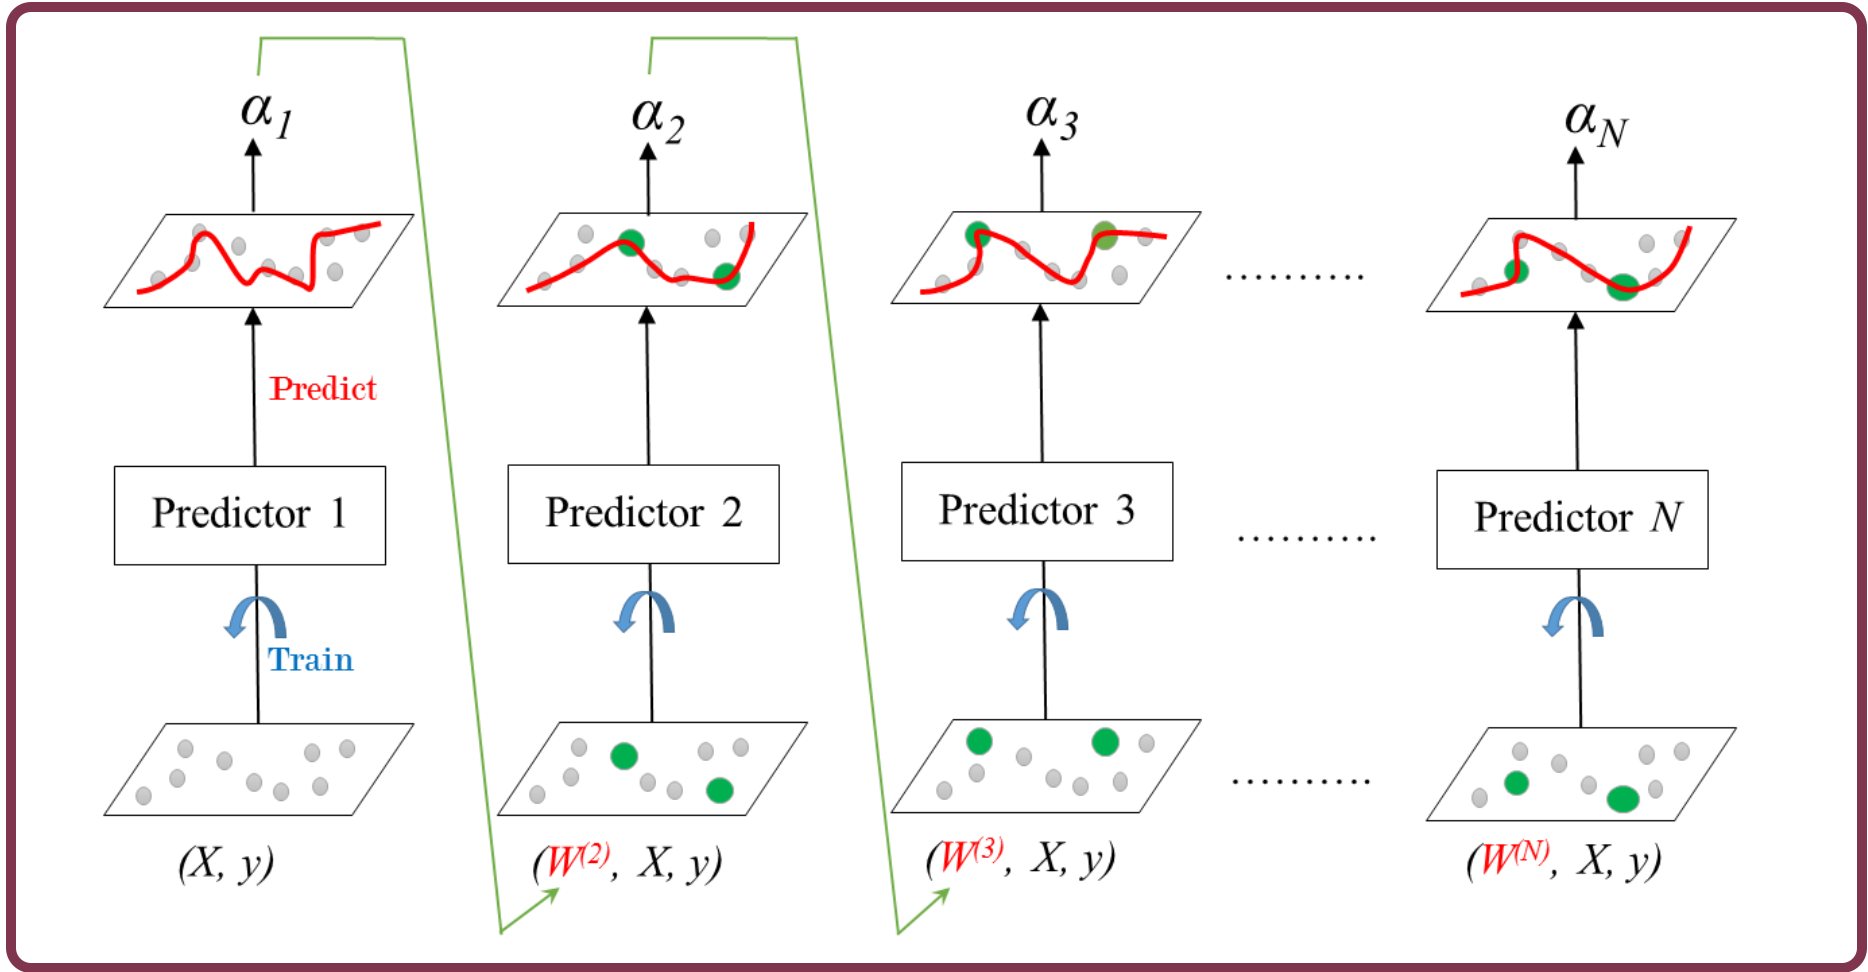

### Learning Rate

 - An important parameter used in training is the **learning rate**, $\eta \ \ \text{eta}$. 
 
 - **The learning rate Eta** is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor. 
 
 - It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of eta should be compensated by a greater number of estimators.
 



### Diagram Shows Using Learning Rate

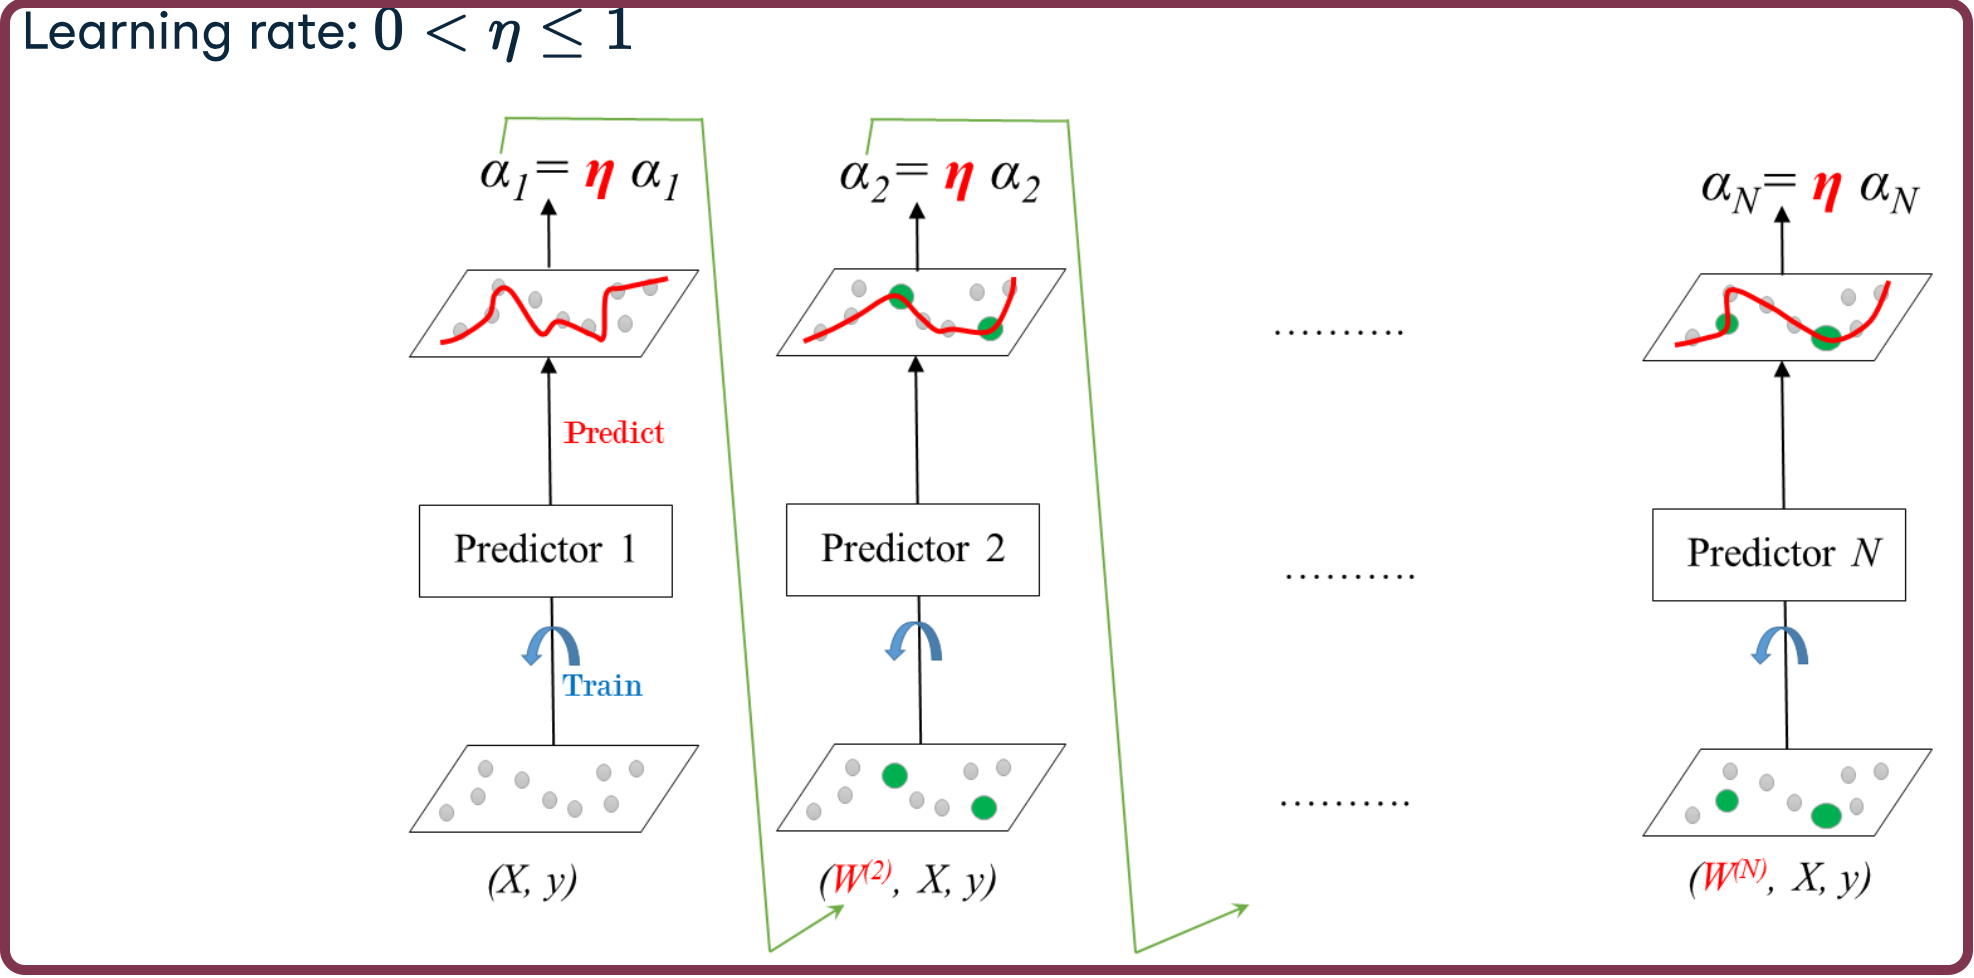

### AdaBoost: Prediction

  - Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem.
      - For classification: each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted **majority voting**.
      - For regression, the same procedure is applied and the ensemble's prediction is obtained by performing a **weighted average**.
      
### Note

 - It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.
 

### Adaboost in sklearn

- The **AdaBoost** classifier takes various parameters. The important ones are explained as follows:
    - `base_estimator`: The learning algorithm that is used to train the models. If a value is not provided for this parameter, the base estimator is DecisionTreeClassifier (max_depth=1).
    - `n_estimators`: The number of models to iteratively train.
    - `learning_rate`: The contribution of each model to the weights. By default, learning_rate has a value of 1. A lower value for the learning rate forces the model to train slower but might result in better performance scores.

### Training Adaboost Algorithm

Here we mention the steps of training an Adaboost Classifier:
  - **Step 01**: Import the classifier `AdaBoostClassifier` and `DecisionTreeClassifier` from `sklearn.ensemble` 
  
  - **Step 02**: Import the splitting function `train_test_split` from `sklearn.model_selection`, also import the evaluation metric `roc_auc_score` from `sklearn.metrics`  
  - **Step 03**: Split the data into train and test sets
  - **Step 04**: Instantiate the classifiers, and mainly set:
      - **base_estimator**: to your decision tree object 
      - **random_state** to have reproducible results using `random_state` parameter.
      - Other parameters based on your needs
  - **Step 05**: Fit the classifier on the training set
  - **Step 06**: Generate probability predictions.
  - **Step 07**: Assess the model performance on test set
  
**Python Syntax for training adaboost classifier**,

```python
 # Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Split data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)
 # Instantiate a classification-tree 'dt'
dtree = DecisionTreeClassifier(max_depth=1,
                            random_state=1)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dtree, 
                             n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

 # Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))
```

# <center><font size=6, color="#7B242F"><u> Breast Cancer Project Using Adaboost </u></font>

In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Classifiers, splitting function
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


# from sklearn.metrics import necessary metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [2]:
## ===================================================
#            Reading and exploring the data
## ===================================================
data_bc = pd.read_csv('breastcancer.csv')
print("*" * 50)
data_bc.info()
print("*" * 50)
data_bc.head()

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,M,842517,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,M,84300903,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,M,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,84358402,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


In [3]:
## ===================================================
#.             Data Preprocessing
## ===================================================
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
# ========================
lab_enc = LabelEncoder()

# Fit label encoder and return encoded labels
# -------------------------------------------
data_bc['diagnosis'] = lab_enc.fit_transform(data_bc['diagnosis'])

# Results in appending a new column to df
# ---------------------------------------
data_bc['diagnosis'].unique()

array([1, 0])

In [4]:
# checkking missing value
# ----------------------
data_bc.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# create features and response variables
# --------------------------------

# Features
# --------
X = data_bc.iloc[:,2:31]  

# Target
# ------
y = data_bc.iloc[:,0] 

# Create train and test sets
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=1, 
                                                    stratify= y)

In [6]:
# Check the after splitting
# -------------------------
print("The X_train shape is: ", X_train.shape)
print("The y_train shape is: ", y_train.shape)
print("The X_test shape is : ", X_test.shape)
print("The y_train shape is: ",y_test.shape)

The X_train shape is:  (398, 29)
The y_train shape is:  (398,)
The X_test shape is :  (171, 29)
The y_train shape is:  (171,)


In [7]:
print("="*50)

In [8]:
## ==================================================
#.      Fitting Adaboost Algorithm
## ==================================================

# Instantiate dtree
# ------------------
dtree = DecisionTreeClassifier(max_depth=3,
                              random_state=1)

# Instantiate ad_clf
# ------------------
ada_clf = AdaBoostClassifier(base_estimator=dtree,
                             n_estimators=180, 
                             random_state=1)

# Fit ada_clf to the training set
# -----------------------------
ada_clf.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
# ---------------------------------------------------------
y_pred_proba = ada_clf.predict_proba(X_test)[:, 1]


# Evaluate test-set roc_auc_score
# --------------------------------
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
#--------------------
print("*"*40)
print('ROC AUC score: {:.3f}'.format(ada_roc_auc))
print("*"*40)

****************************************
ROC AUC score: 0.993
****************************************


## Comparing the Adaboost with Other Algorithms

In [9]:
## ==================================================
#.      Fitting a Single Decision Tree 
## ==================================================

dtree = DecisionTreeClassifier(max_depth=3, random_state=1)
dtree.fit(X_train, y_train)

# Decision tree accuracy accuracy
# -------------------------------

dtree_acc = dtree.score(X_test,y_test)

print('The Results of the decision Tree'.center(50))
print("*"*50)
print('The accuracy of the decision tree is:{:.4f} '.format(dtree_acc))
print("*"*50)
# AUC score
# ---------
y_pred_dtree = dtree.predict_proba(X_test)

fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, y_pred_dtree[:,1])
auc_dtree = auc(fpr_dtree, tpr_dtree)


print ('The Decision Tree AUC Score:{:.4f}'.format(auc_dtree))
print("*"*50)

         The Results of the decision Tree         
**************************************************
The accuracy of the decision tree is:0.9240 
**************************************************
The Decision Tree AUC Score:0.9145
**************************************************


In [10]:
## ======================================================
#       Training Adaboost with a predefined learning rate
## =======================================================

# Set Learning rate to 0.1 then fit adaboost 
# ------------------------------------------
ada_lr = AdaBoostClassifier(n_estimators=100,
                              base_estimator=dtree, 
                              learning_rate=0.1, 
                              random_state=1)
ada_lr.fit(X_train, y_train)

# Print the accuracy
# -------------------
ada_lr_acc = ada_lr.score(X_test,y_test)

print("*"*50)
print('The mean accuracy is: {:.4f}'.format(ada_lr_acc))
print("*"*50)

# The AUC Score
# -------------
y_pred_adaboost = ada_lr.predict_proba(X_test)

fpr_ab, tpr_ab, thresholds = roc_curve(y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_ab, tpr_ab)
print ('the AUC Score is: {:.4f} '.format(auc_adaboost))
print("*"*50)

**************************************************
The mean accuracy is: 0.9240
**************************************************
the AUC Score is: 0.9775 
**************************************************


# <center><font size=6, color="#FF242F"><u> AdaBoost Hyperparameter Tuning </u></font>

In [11]:
## ========================================================
#.     Adaboost hyperparameter tuning with decision tree as
#.     a base learner using GridSeachCV Algorithm
## ========================================================

# Create the estimator with dtree
# -------------------------------
ada_tree = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
                        max_depth=3,                                    
                        random_state=1),             
                        random_state=1)

ada_param_grid = {'n_estimators': [10, 100],
                 'learning_rate': [0.01, 1]}

ada_gs = GridSearchCV(estimator=ada_tree ,
                       param_grid=ada_param_grid,
                       #cv = 10,
                       verbose = 1)

# Fitting the grid
# ---------------
ada_gs_model = ada_gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [12]:
print("*"*40)

for hyper_name, val in ada_gs_model.best_params_.items():
    print("{:15s} : {}".format(hyper_name, val))
print("*"*40)
print("The best score: {:.4f}".format(ada_gs_model.best_score_))
print("*"*40)

****************************************
learning_rate   : 1
n_estimators    : 100
****************************************
The best score: 0.9824
****************************************


In [13]:
## =======================================================
#      Fitting the tuned adaboost
## =======================================================

dtree = DecisionTreeClassifier(max_depth=3, random_state=1)
#dtree.fit(X_train, Y_train)

# Tuning the hyperparams
ada_tuned = AdaBoostClassifier(
           base_estimator=DecisionTreeClassifier(max_depth=3, 
                                          random_state=1),                          
           n_estimators=100,                                                                              
           learning_rate=1,                                   
           random_state=1)

ada_tuned.fit(X_train, y_train)

# The accuracy of tuned model
# ---------------------------
print("*"*40)
print('The Tuned model accuracy is: {:.4}'.format(
    (ada_tuned.score(X_test,y_test)))
     )
print("*"*40)

# The Tuned model AUC score
# -------------------------
y_pred_ada_tuned = ada_tuned.predict_proba(X_test)
fpr_ab_tuned, tpr_ab_tuned, thresholds = roc_curve(y_test, y_pred_ada_tuned[:,1])
auc_adaboost_tune = auc(fpr_ab_tuned, tpr_ab_tuned)

print ('The Tuned Adaboost AUC Score is: {:.4f}'.format(auc_adaboost_tune))
print("*"*40)

****************************************
The Tuned model accuracy is: 0.9474
****************************************
The Tuned Adaboost AUC Score is: 0.9908
****************************************


## <center><font size=6, color="#7B249F"><u> Adaboost with SVM Classifier </u> </font>

In [14]:
## =======================================================================
#     Training AdaBoost Algorithm with SVM Classifier as a base estimator
## =======================================================================

from sklearn.svm import SVC

ada_svc_rbf =AdaBoostClassifier(n_estimators=100,
                                          base_estimator =SVC(C=100,
                                                              probability=True,
                                                              kernel='rbf'),
                                          learning_rate=1,
                                          random_state=1)

# Fitting the model
# -------------------
ada_svc_rbf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(C=100, probability=True), learning_rate=1,
                   n_estimators=100, random_state=1)

In [15]:
# The Accuracy of adaboost with svc
# ----------------------------------
print("*"*40)
print('The adaboost with svc accuracy is:{:.4f}'.format(
   ada_svc_rbf.score(X_test,y_test))
     ) 
print("*"*40)

# The adaboost with SVC AUC score
# -------------------------------
y_pred_svc_rbf = ada_svc_rbf.predict_proba(X_test)
fpr_svc_rbf, tpr_svc_rbf, thresholds = roc_curve(y_test, y_pred_svc_rbf[:,1])
auc_svc_rbf = auc(fpr_svc_rbf, tpr_svc_rbf)

print ('The adaboost with SVC AUC score: {:.4f}'.format(auc_svc_rbf))
print("*"*40)

****************************************
The adaboost with svc accuracy is:0.6316
****************************************
The adaboost with SVC AUC score: 0.9790
****************************************


In [16]:
## =======================================================================
#     Training AdaBoost Algorithm with 
#     Linear SVM Classifier as a base estimator
## =======================================================================
ada_svc_lin =AdaBoostClassifier(n_estimators=100,
                                          base_estimator =SVC(C=100,
                                                              probability=True,
                                                              kernel='linear'),
                                          learning_rate=1,
                                          random_state=1)

# Fitting the model
# -------------------
ada_svc_lin.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(C=100, kernel='linear', probability=True),
                   learning_rate=1, n_estimators=100, random_state=1)

In [17]:
# The Accuracy of adaboost with svc
# ----------------------------------
print("*"*40)
print('The adaboost with svc accuracy is:{:.4f}'.format(
   ada_svc_lin.score(X_test,y_test))
     ) 
print("*"*40)

# The adaboost with SVC AUC score
# -------------------------------
y_pred_svc_lin = ada_svc_lin.predict_proba(X_test)
fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(y_test, y_pred_svc_lin[:,1])
auc_svc_lin = auc(fpr_svc_lin, tpr_svc_lin)

print ('The adaboost with SVC AUC score: {:.4f}'.format(auc_svc_lin))
print("*"*40)

****************************************
The adaboost with svc accuracy is:0.7427
****************************************
The adaboost with SVC AUC score: 0.9847
****************************************


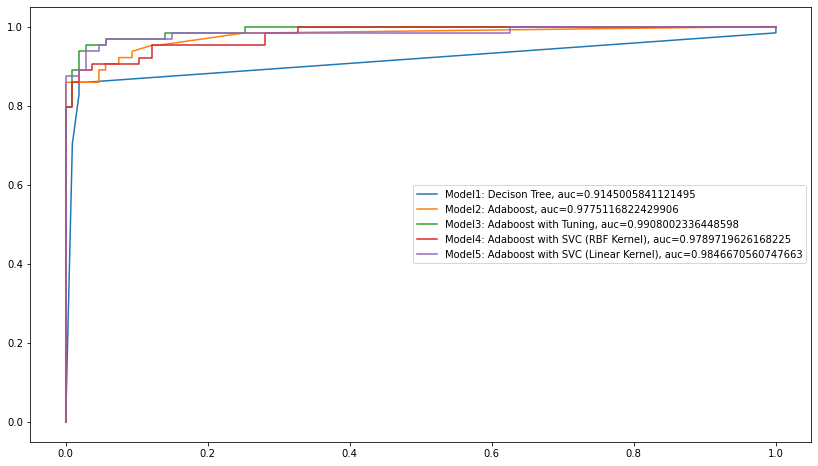

In [18]:
plt.figure(figsize=(14,8))

plt.plot(fpr_dtree, tpr_dtree,label="Model1: Decison Tree, auc="+str(auc_dtree))
plt.plot(fpr_ab, tpr_ab,label="Model2: Adaboost, auc="+str(auc_adaboost))
plt.plot(fpr_ab_tuned,tpr_ab_tuned,
         label="Model3: Adaboost with Tuning, auc="+
         str(auc_adaboost_tune))

plt.plot(fpr_svc_rbf, tpr_svc_rbf, 
         label="Model4: Adaboost with SVC (RBF Kernel), auc="+str(auc_svc_rbf))
plt.plot(fpr_svc_lin, tpr_svc_lin, 
         label="Model5: Adaboost with SVC (Linear Kernel), auc="+str(auc_svc_lin))

plt.legend(loc=5)
plt.show()

In [19]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=1)
dtree.fit(X_train, y_train)

plt.figure(figsize=(14,8))

label = ['Decison Tree', 'Adaboost', 'Adaboost with Tuning',
         'Adaboost with SVC (RBF)', 'Adaboost with SVC (Linear)']
values = [dtree.score(X_test,y_test),
         ada_clf.score(X_test,y_test),
         ada_tuned.score(X_test,y_test),
         ada_svc_rbf.score(X_test,y_test),
         ada_svc_lin.score(X_test,y_test)]

<Figure size 1008x576 with 0 Axes>

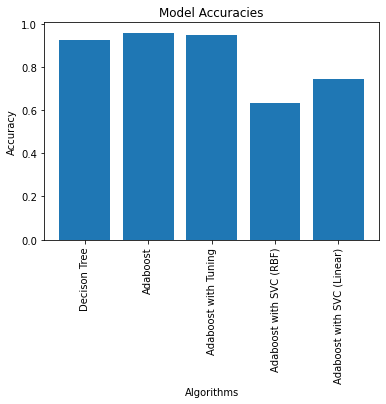

In [20]:
def plot_bar_accuracy():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Algorithms', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Model Accuracies')
    plt.show()
    
plot_bar_accuracy()